Dataset Shape: (9994, 13)
Columns: Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

 Model Performance (Gradient Boosting):
MAE : 24.8
RMSE: 189.25
R²  : 0.26


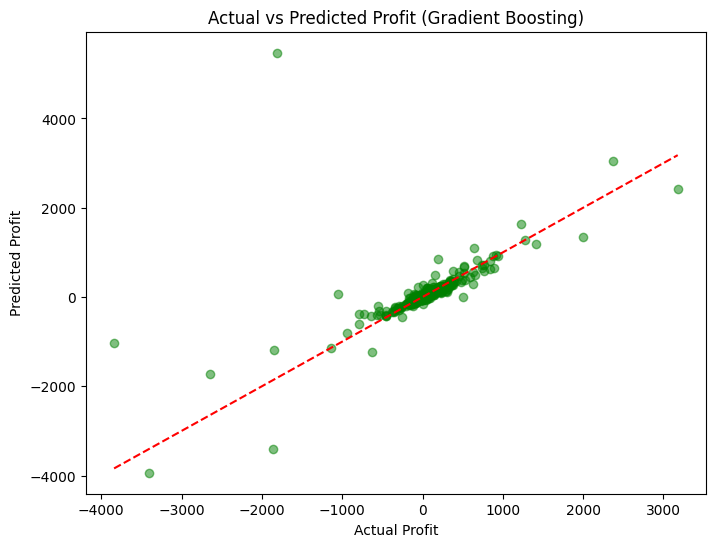

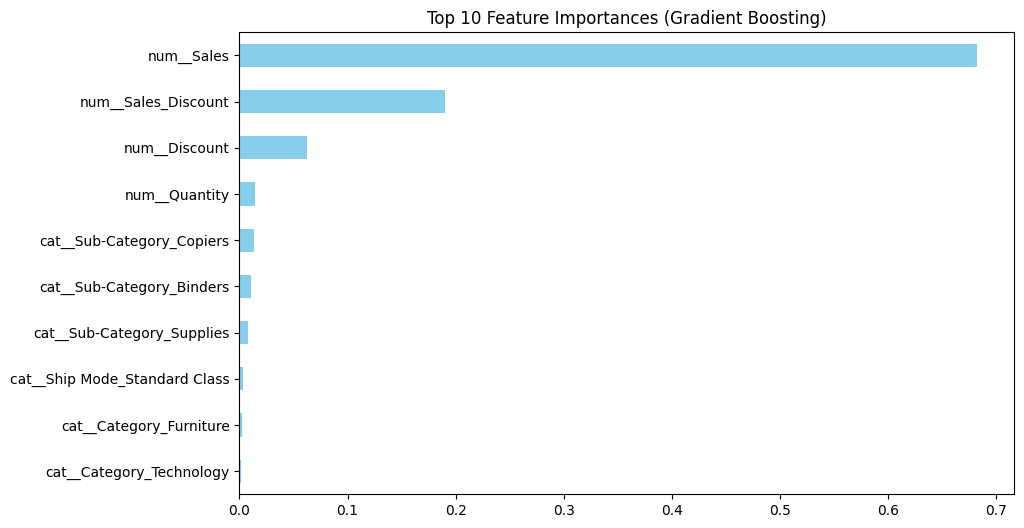

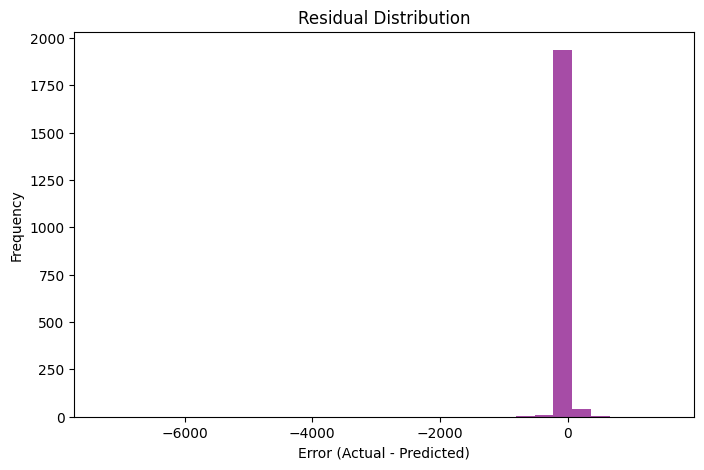

In [1]:
# Retail Profit Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"E:\Retail_Sales_Analysis\data\SampleSuperstore.csv")

print("Dataset Shape:", df.shape)
print("Columns:", df.columns)

# Select features & target
X = df[['Sales', 'Quantity', 'Discount', 'Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode']].copy()
y = df['Profit']

# Feature engineering
X['Sales_Discount'] = X['Sales'] * X['Discount']

# Preprocessing 
categorical_cols = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode']
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Sales_Discount']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ])

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=200, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n Model Performance (Gradient Boosting):")
print("MAE :", round(mae,2))
print("RMSE:", round(rmse,2))
print("R²  :", round(r2,2))

# Visualizations


# 1. Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° line
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit (Gradient Boosting)")
plt.show()

# 2. Feature Importance
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
importances = model.named_steps['regressor'].feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='barh', color="skyblue")
plt.title("Top 10 Feature Importances (Gradient Boosting)")
plt.gca().invert_yaxis()
plt.show()

# 3. Residual Distribution
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, color="purple", alpha=0.7)
plt.title("Residual Distribution")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()
